In [ ]:
** Student ID:- 23051708 **
** Github_link:- https://github.com/kiran-kumar-reddy01/Machine-learning-tutorial **

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using sepal length and width
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train and evaluate models
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    model = svm.SVC(kernel=kernel, gamma='auto')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models[kernel] = {'model': model, 'accuracy': accuracy}

In [4]:
# Plotting function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

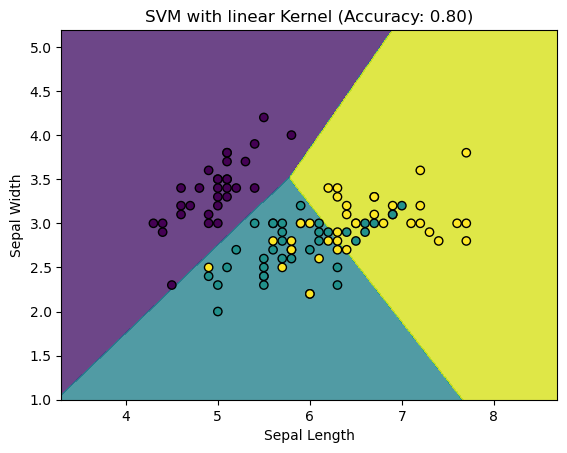

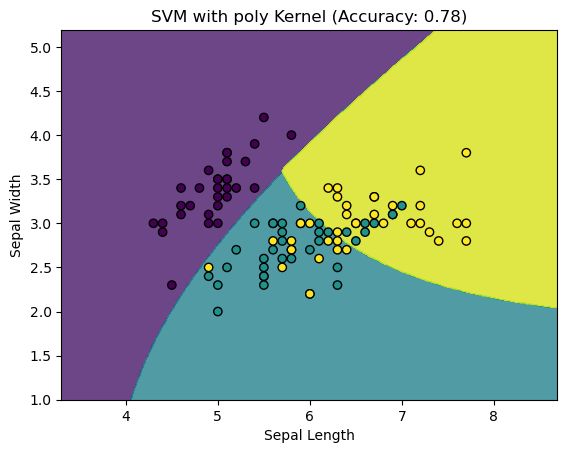

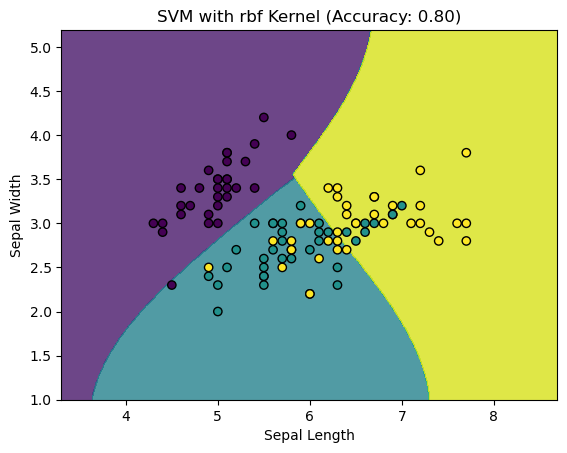

In [5]:
# Plot decision boundaries for each kernel
for kernel in kernels:
    plot_decision_boundary(
        models[kernel]['model'], X_train, y_train,
        f'SVM with {kernel} Kernel (Accuracy: {models[kernel]["accuracy"]:.2f})'
    )
